In [23]:
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [137]:
country_dir = "country_dir"

country_dfs = ["depression_by_age", "depression_by_education", "depression_by_sex", "depression_suicide_rates", "illness_rates"]

# Dictionary to hold DataFrames
dataframes = {}

# Loop through files and assign DataFrames to dictionary
for filename, key in zip(os.listdir(country_dir), country_dfs):
    f = os.path.join(country_dir, filename)
    dataframes[key] = pd.read_csv(f)

# Access DataFrames by name
depression_by_age = dataframes["depression_by_age"]
depression_by_education = dataframes["depression_by_education"]
depression_by_sex = dataframes["depression_by_sex"]
depression_suicide_rates = dataframes["depression_suicide_rates"]
illness_rates = dataframes["illness_rates"]

In [138]:
12/1000

0.012

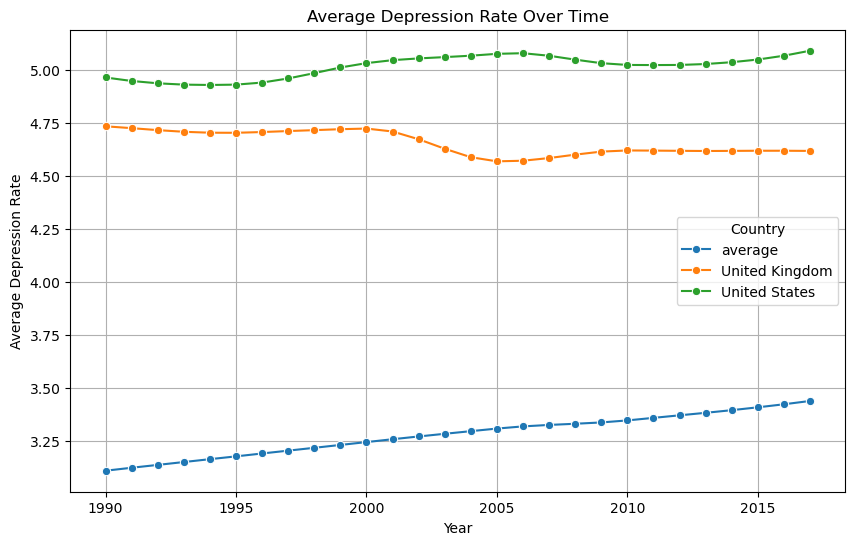

In [139]:
# Step 1: Calculate average depression rate by year
avg_depression_rate = depression_by_age.groupby('year')['all_ages'].mean().reset_index()
avg_depression_rate['entity'] = 'average'  # Add a label for easier plotting

countries_of_interest = depression_by_age[depression_by_age['entity'].isin(['United States', 'United Kingdom'])]

plot_data = pd.concat([avg_depression_rate, countries_of_interest])

# Step 2: Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='year', y='all_ages', hue="entity", marker='o')
plt.title('Average Depression Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Depression Rate')
plt.legend(title='Country')
plt.grid(True)
plt.show()

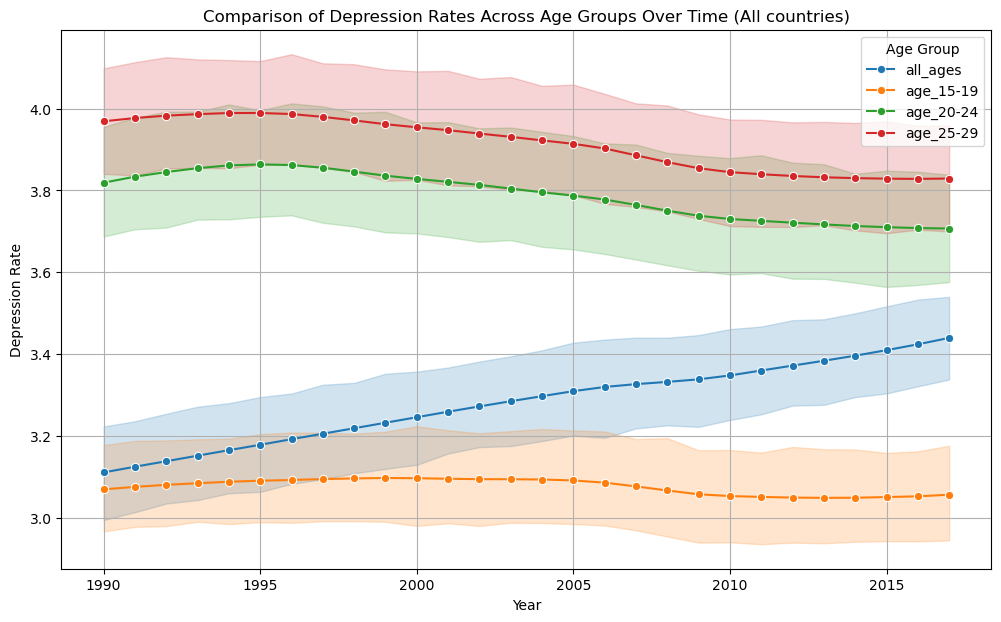

In [140]:
age_columns = ['all_ages', 'age_15-19', 'age_20-24', 'age_25-29'] 
df_melted = pd.melt(depression_by_age, id_vars='year', value_vars=age_columns, 
                    var_name='AgeGroup', value_name='DepressionRate')

# Step 2: Plot the data
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted, x='year', y='DepressionRate', hue='AgeGroup', marker='o')
plt.title('Comparison of Depression Rates Across Age Groups Over Time (All countries)')
plt.xlabel('Year')
plt.ylabel('Depression Rate')
plt.grid(True)
plt.legend(title='Age Group')
plt.show()

In [141]:
depression_by_sex = depression_by_sex.dropna()

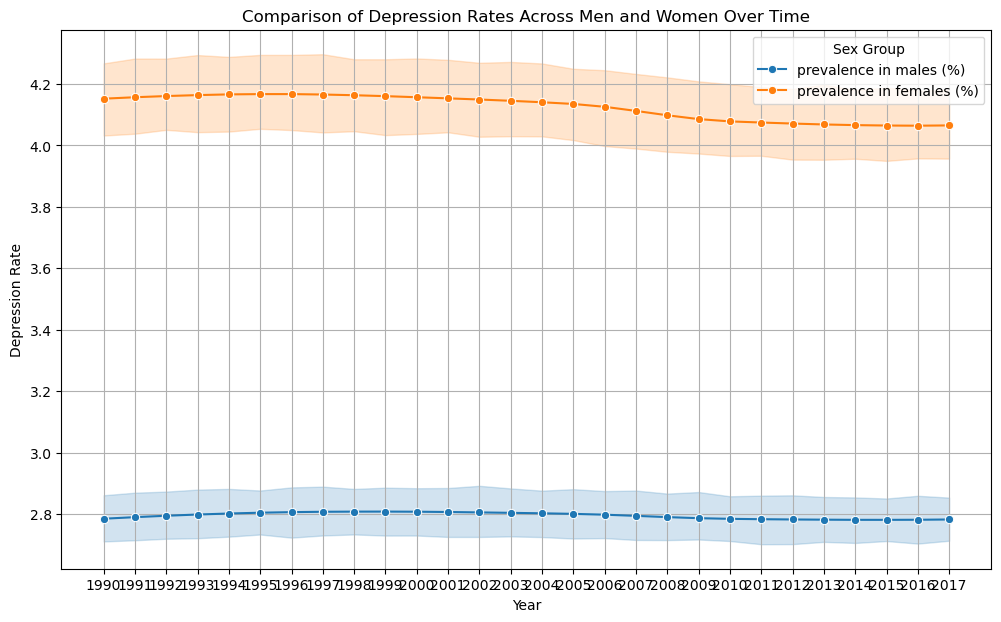

In [142]:
sex_columns = ['prevalence in males (%)', 'prevalence in females (%)'] 
df_melted = pd.melt(depression_by_sex, id_vars='year', value_vars=sex_columns, 
                    var_name='SexGroup', value_name='DepressionRate')

# Step 2: Plot the data
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted, x='year', y='DepressionRate', hue='SexGroup', marker='o')
plt.title('Comparison of Depression Rates Across Men and Women Over Time')
plt.xlabel('Year')
plt.ylabel('Depression Rate')
plt.grid(True)
plt.legend(title='Sex Group')
plt.show()

In [143]:
df = pd.read_csv("Mental_Health_Care_in_the_Last_4_Weeks.csv")

In [144]:
df['Value'] = df.groupby(['Indicator', 'Group', 'Subgroup', 'State'])['Value'].transform(lambda x: x.fillna(x.mean()))
df = df.drop(['LowCI', 'HighCI'], axis=1)

df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])

df.head()

,Indicator,Group,State,Subgroup,Time Period Start Date,Time Period End Date,Value
0,Needed Counseling or Therapy But Did Not Get I...,By Age,United States,18 - 29 years,2020-08-19,2020-08-31,15.6
1,Needed Counseling or Therapy But Did Not Get I...,By Age,United States,30 - 39 years,2020-08-19,2020-08-31,12.9
2,Needed Counseling or Therapy But Did Not Get I...,By Age,United States,40 - 49 years,2020-08-19,2020-08-31,10.0
3,Needed Counseling or Therapy But Did Not Get I...,By Age,United States,50 - 59 years,2020-08-19,2020-08-31,7.7
4,Needed Counseling or Therapy But Did Not Get I...,By Age,United States,60 - 69 years,2020-08-19,2020-08-31,5.3


In [145]:
df.groupby('Indicator')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Indicator,,,,,,,,
"Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks",2601.0,11.201111,4.525230,1.4,9.0,10.7,12.6,51.5
"Received Counseling or Therapy, Last 4 Weeks",2601.0,10.446326,3.894263,1.4,8.3,10.0,11.9,45.7
"Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks",2601.0,25.747928,5.742825,10.3,22.5,25.7,28.3,62.9
"Took Prescription Medication for Mental Health, Last 4 Weeks",2601.0,22.263963,5.267176,7.3,19.4,22.0,24.7,54.7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


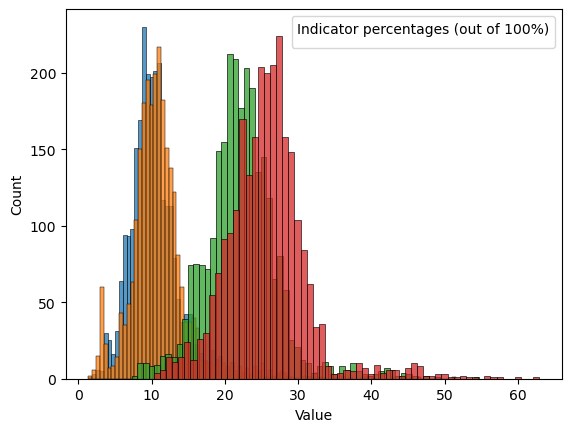

In [146]:
sns.histplot(df[df['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']['Value'])
sns.histplot(df[df['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']['Value'])
sns.histplot(df[df['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']['Value'])
sns.histplot(df[df['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']['Value'])
plt.legend(title='Indicator percentages (out of 100%)')

In [47]:
print("Unique values in 'Group':", df['Group'].unique())
print("Unique values in 'Subgroup':", df['Subgroup'].unique())

Unique values in 'Group': ['By Age' 'By Education' 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Sex' 'By State' 'National Estimate'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']
Unique values in 'State': ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Unique values in 'Subgroup': ['18 - 29 years' '30 - 39 years' '40 - 49 years' '50 - 59 years'
 '60 - 69 years' '70

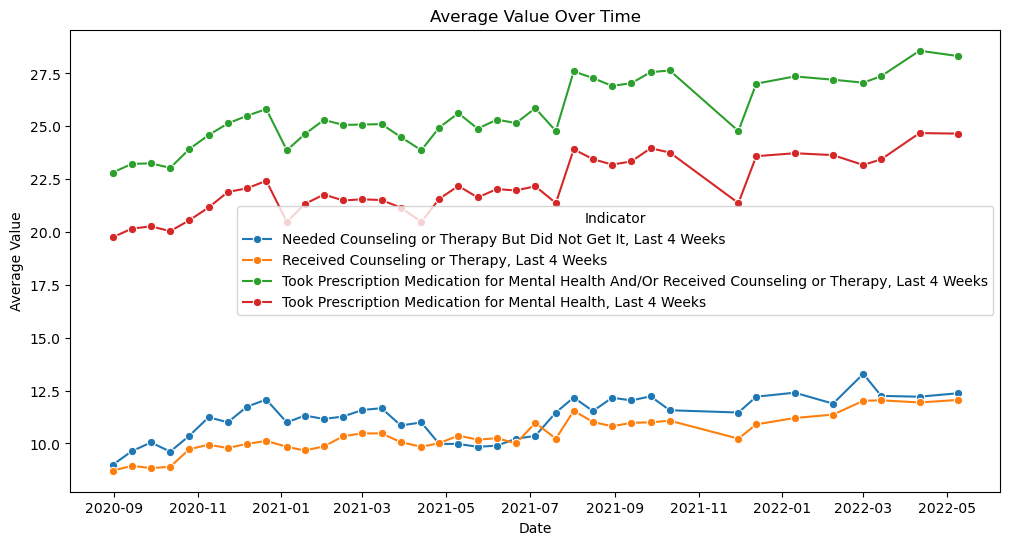

In [63]:
# Calculate mean value over time
df_time = df.groupby(['Time Period End Date', 'Indicator'])['Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='Time Period End Date', y='Value', hue='Indicator', marker='o')
plt.title("Average Value Over Time")
plt.xlabel("Date")
plt.ylabel("Average Value")
plt.show()

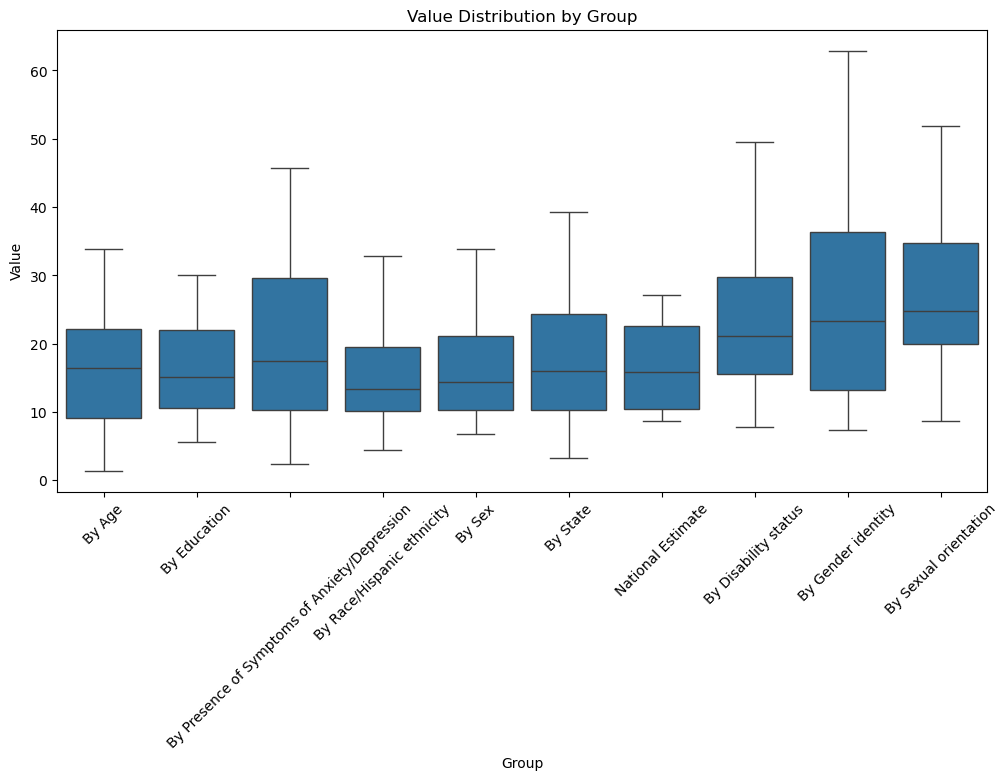

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Group', y='Value')
plt.title("Value Distribution by Group")
plt.xticks(rotation=45)
plt.show()

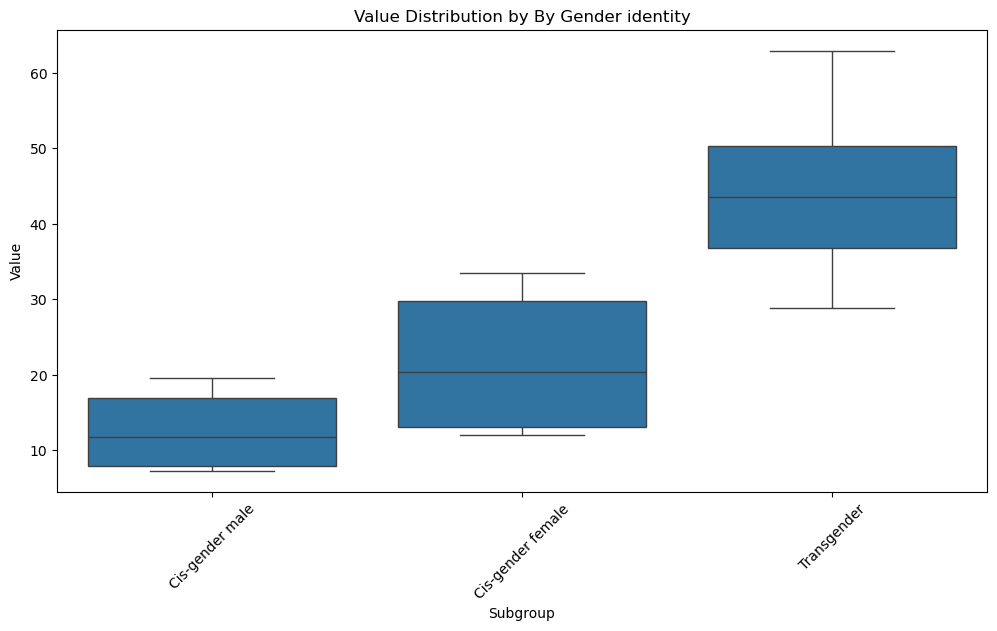

In [67]:
# Boxplot of 'Value' by 'Subgroup' for a specific 'Group'
group_filter = "By Age"  # Change this to explore other groups like 'By Education'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Group'] == group_filter], x='Subgroup', y='Value')
plt.title(f"Value Distribution by {group_filter}")
plt.xticks(rotation=45)
plt.show()

In [83]:
df_non_state = df.drop('State', axis=1)
df_non_state = df_non_state[df_non_state['Group'] != 'By State']
df_non_state

,Indicator,Group,Subgroup,Time Period Start Date,Time Period End Date,Value
0,Needed Counseling or Therapy But Did Not Get I...,By Age,18 - 29 years,2020-08-19,2020-08-31,15.6
1,Needed Counseling or Therapy But Did Not Get I...,By Age,30 - 39 years,2020-08-19,2020-08-31,12.9
2,Needed Counseling or Therapy But Did Not Get I...,By Age,40 - 49 years,2020-08-19,2020-08-31,10.0
3,Needed Counseling or Therapy But Did Not Get I...,By Age,50 - 59 years,2020-08-19,2020-08-31,7.7
4,Needed Counseling or Therapy But Did Not Get I...,By Age,60 - 69 years,2020-08-19,2020-08-31,5.3
...,...,...,...,...,...,...
10348,Took Prescription Medication for Mental Health...,By Sex,Female,2022-04-27,2022-05-09,28.8
10349,Took Prescription Medication for Mental Health...,By Sexual orientation,Gay or lesbian,2022-04-27,2022-05-09,34.3
10350,Took Prescription Medication for Mental Health...,By Sexual orientation,Straight,2022-04-27,2022-05-09,21.6
10351,Took Prescription Medication for Mental Health...,By Sexual orientation,Bisexual,2022-04-27,2022-05-09,38.6


In [101]:
var = 'Group'
df_simple = df_non_state[df_non_state[var] == 'By Education']
df_simple.drop(['Time Period End Date', 'Time Period Start Date', 'Value', var], axis=1, inplace=True)
df_encoded = pd.get_dummies(df_simple, columns=['Subgroup', 'Indicator'], drop_first=True)

C:\Users\bryce\AppData\Local\Temp\ipykernel_30012\3105498308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple.drop(['Time Period End Date', 'Time Period Start Date', 'Value', var], axis=1, inplace=True)


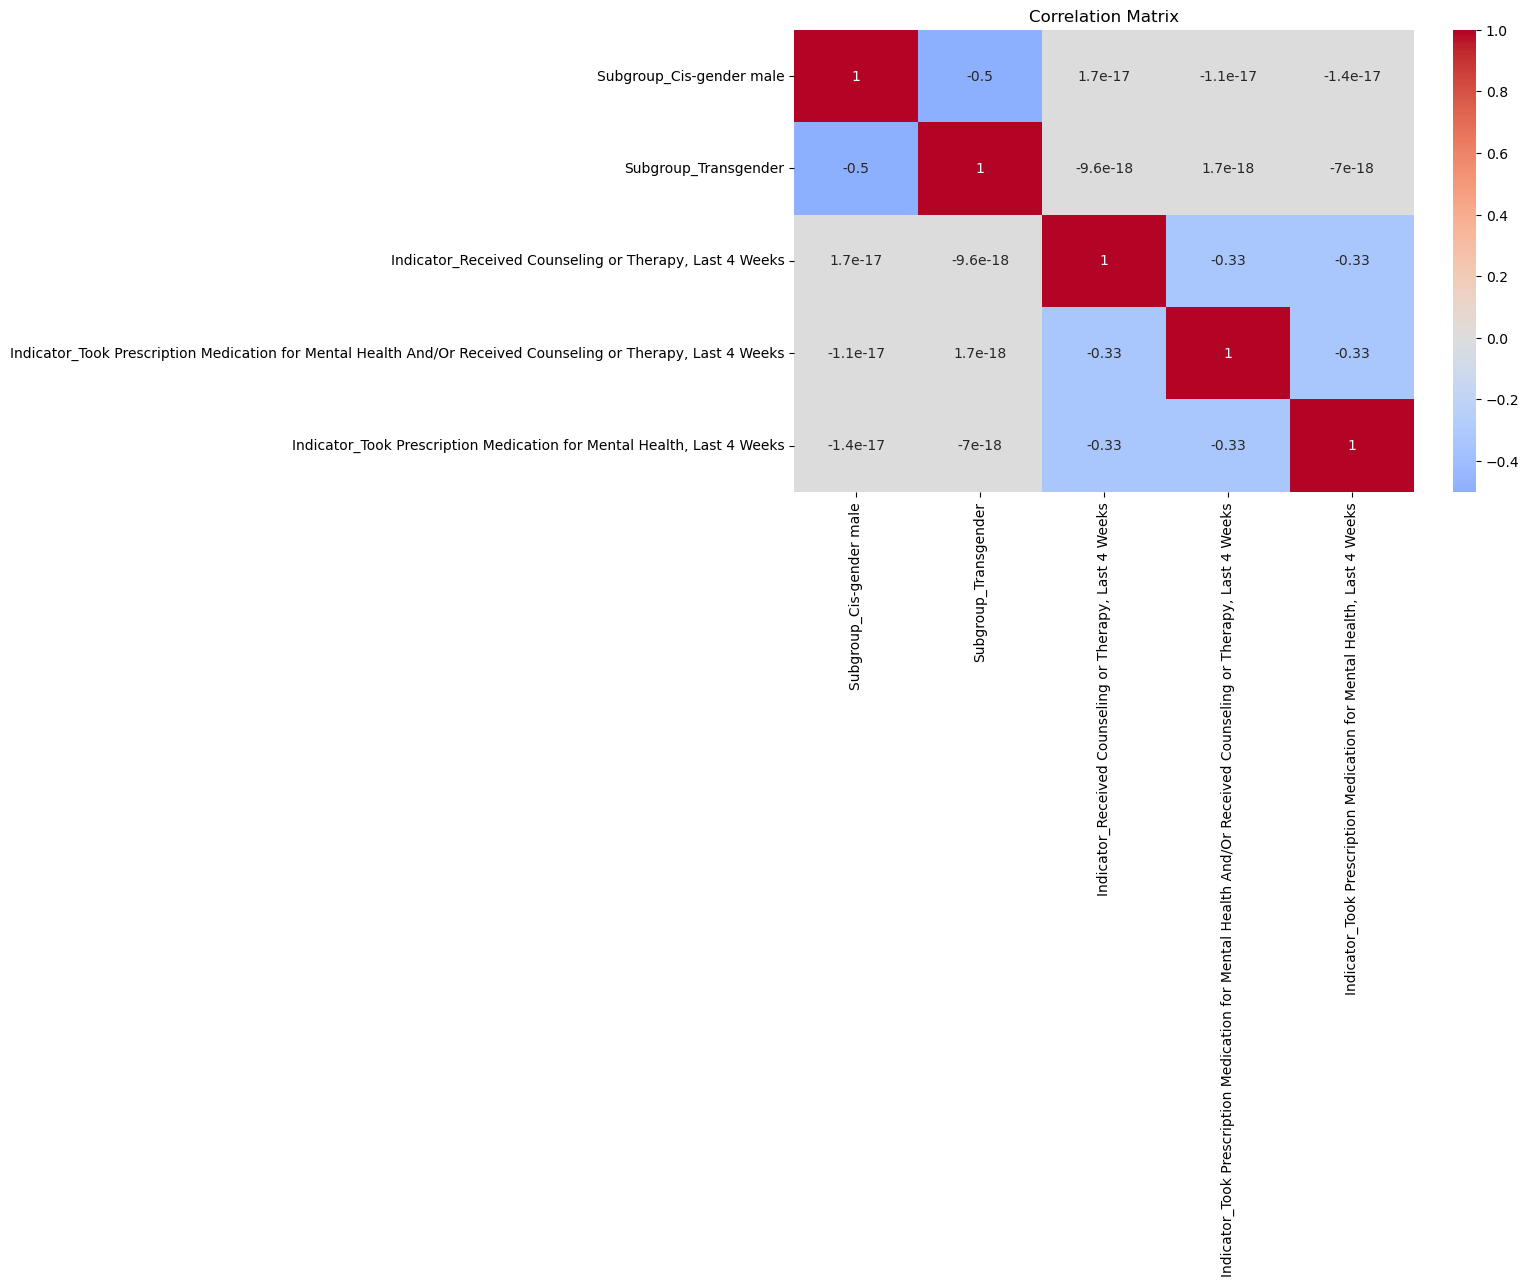

In [102]:
corr = df_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [116]:
sm_df = pd.read_csv('smmh.csv')
sm_df['timestamp'] = pd.to_datetime(sm_df['timestamp'])
sm_df['hour_of_day'] = sm_df['timestamp'].dt.hour
sm_df['hrs_from_midnight'] = sm_df['hour_of_day'].apply(lambda x: min(x, 24 - x))

platforms_split = sm_df['platform'].str.get_dummies(sep=', ')
platforms_split['platform_count'] = platforms_split.sum(axis=1)
sm_df = pd.concat([sm_df, platforms_split], axis=1)
sm_df.drop('platform', axis=1, inplace=True)

sm_df

,timestamp,age,gender,relationship,occupation,organization,use_social_media,avg_time,purposeless_sm_use,distracted_sm_while_busy,...,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,platform_count
0,2022-04-18 19:18:00,21.0,Male,In a relationship,University Student,University,Yes,2-3 hours,5,3,...,1,1,1,0,1,0,0,1,1,6
1,2022-04-18 19:19:00,21.0,Female,Single,University Student,University,Yes,5+ hours,4,3,...,1,1,1,0,1,0,0,1,1,6
2,2022-04-18 19:25:00,21.0,Female,Single,University Student,University,Yes,3-4 hours,3,2,...,0,1,1,1,0,0,0,0,1,4
3,2022-04-18 19:29:00,21.0,Female,Single,University Student,University,Yes,5+ hours,4,2,...,0,1,1,0,0,0,0,0,0,2
4,2022-04-18 19:33:00,21.0,Female,Single,University Student,University,Yes,2-3 hours,3,5,...,0,1,1,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:00,24.0,Male,Single,Salaried Worker,"University, Private",Yes,2-3 hours,3,4,...,0,1,1,0,0,0,0,0,1,3
477,2022-05-22 00:01:00,26.0,Female,Married,Salaried Worker,University,Yes,1-2 hours,2,1,...,0,1,0,0,0,0,0,0,1,2
478,2022-05-22 10:29:00,29.0,Female,Married,Salaried Worker,University,Yes,2-3 hours,3,3,...,0,1,0,0,0,0,0,0,1,2
479,2022-07-14 19:33:00,21.0,Male,Single,University Student,University,Yes,2-3 hours,2,3,...,1,1,1,1,0,0,0,1,1,6


In [132]:
sm_df['use_social_media']

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
476    Yes
477    Yes
478    Yes
479    Yes
480    Yes
Name: use_social_media, Length: 481, dtype: object